Our implementation
L-BFGS          ==>  -0.041983 in [ -0.822934,  -0.499453] in 10 steps.


<Figure size 800x800 with 0 Axes>

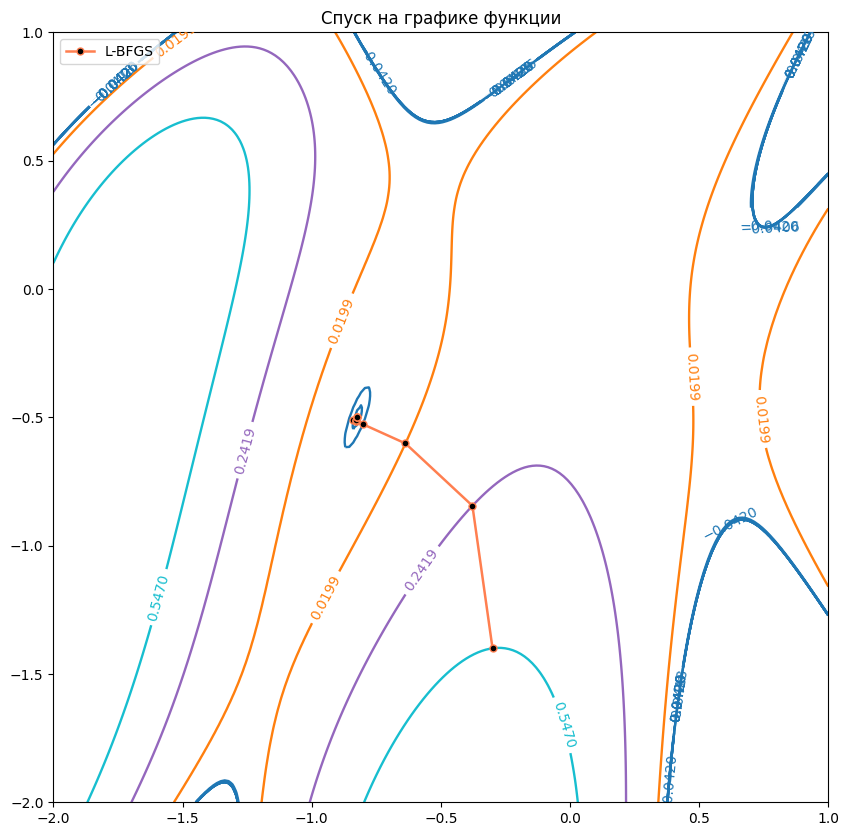

L-BFGS          ==>  -0.041983 in [ -0.822934,  -0.499453] in 10 steps.


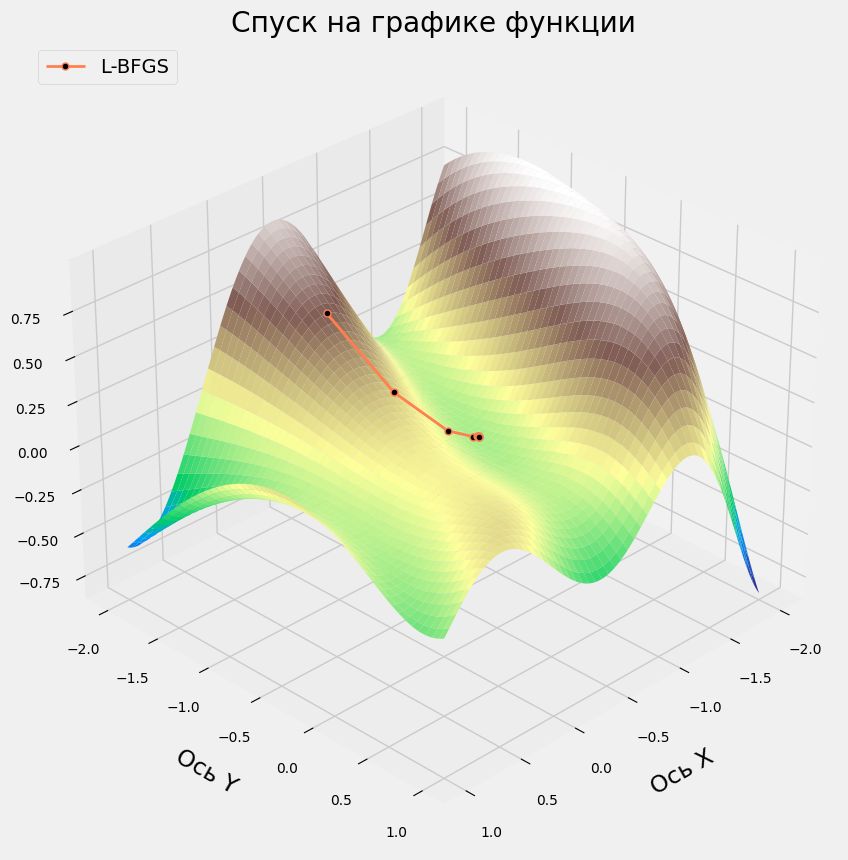

SciPy implementation
SciPy L-BFGS    ==>  -0.041983 in [ -0.822922,  -0.499418] in 8 steps.


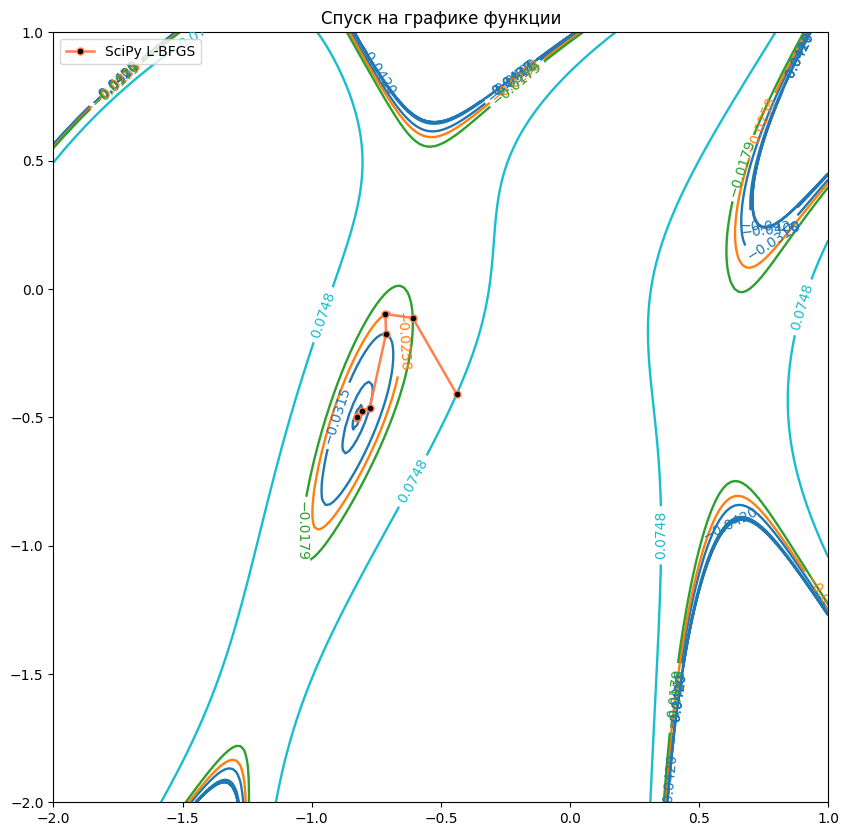

SciPy L-BFGS    ==>  -0.041983 in [ -0.822922,  -0.499418] in 8 steps.


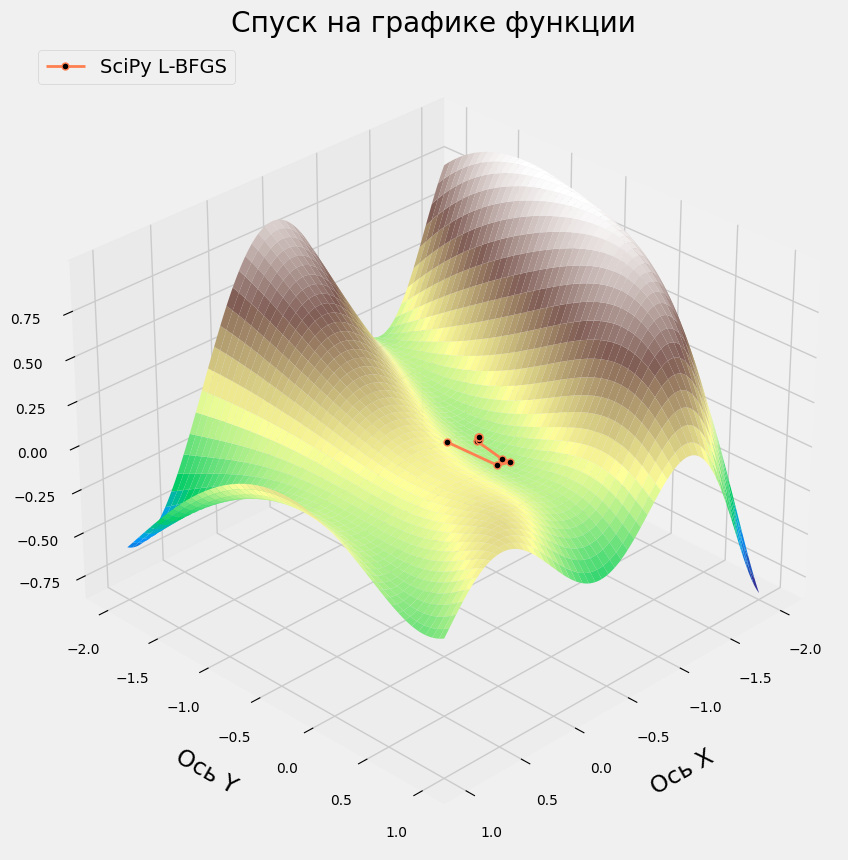

In [1]:
import sys
sys.path.append('../')

from matplotlib import pyplot as plt
from collections import deque
from scipy.optimize import *
import numpy as np
import helper


def grad(x, f, delta=1e-7):
    n = len(x)
    ans = np.zeros(n, dtype=float)
    params = x.copy()

    for j in range(n):
        params[j] += delta
        f_plus = f(params)
        params[j] -= delta
        params[j] -= delta
        f_minus = f(params)
        params[j] += delta
        ans[j] = np.divide(f_plus - f_minus, 2 * delta)

    return ans


def l_bfgs(initial_w, func, max_iter=1000, m=10, tolerance=1e-20, eps=1e-10):
    result = [np.copy(initial_w)]
    current_x = np.copy(initial_w)
    n = len(initial_w)
    H = 1

    y = deque(maxlen=m)
    s = deque(maxlen=m)
    rho = deque(maxlen=m)

    for i in range(max_iter):
        q = grad(current_x, func)

        alpha = np.zeros(m)

        if i > m:
            for i in reversed(range(len(y))):
                alpha[i] = rho[i] * s[i].T @ q
                q = q - alpha[i] * y[i]

        r = H * q

        if i > m:
            for i in range(len(y)):
                beta = rho[i] * y[i].T @ r
                r = r + s[i] * (alpha[i] - beta)

        p = -r

        # Wolfe
        a, _, _, _, _, _ = line_search(func, grad, current_x, p, args=(func, ))

        if a is None:
            a = 1e-2

        new_x = current_x + a * p

        if np.linalg.norm(new_x - current_x, 2) < tolerance:
            print("too small")
            break


        s.append(new_x - current_x)
        y.append(grad(new_x, func) - q)
        rho.append(1 / (y[-1].T @ s[-1] + eps))

        H = s[-1].T @ y[-1] / (y[-1].T @ y[-1])

        current_x = new_x
        result.append(current_x)

    return result


def f_lecture(x, _=None):
    return np.sin(0.5 * x[0] ** 2 - 0.25 * x[1] ** 2 + 3) * np.cos(2 * x[0] + 1 - np.exp(x[1]))

def f_himmelblau(x, _=None):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2


_ = plt.figure(figsize=(8, 8))

initial_x = np.array([-0.3, -1.4])

x_lin = np.linspace(-2, 1, 200, dtype=float)
y_lin = np.linspace(-2, 1, 200, dtype=float)

helper.compare(f_lecture, initial_x, x_lin, y_lin, l_bfgs, 'L-BFGS-B', 'L-BFGS', manual_save_history=True)

Our implementation
L-BFGS          ==>   0.000000 in [  3.000000,   2.000000] in 11 steps.


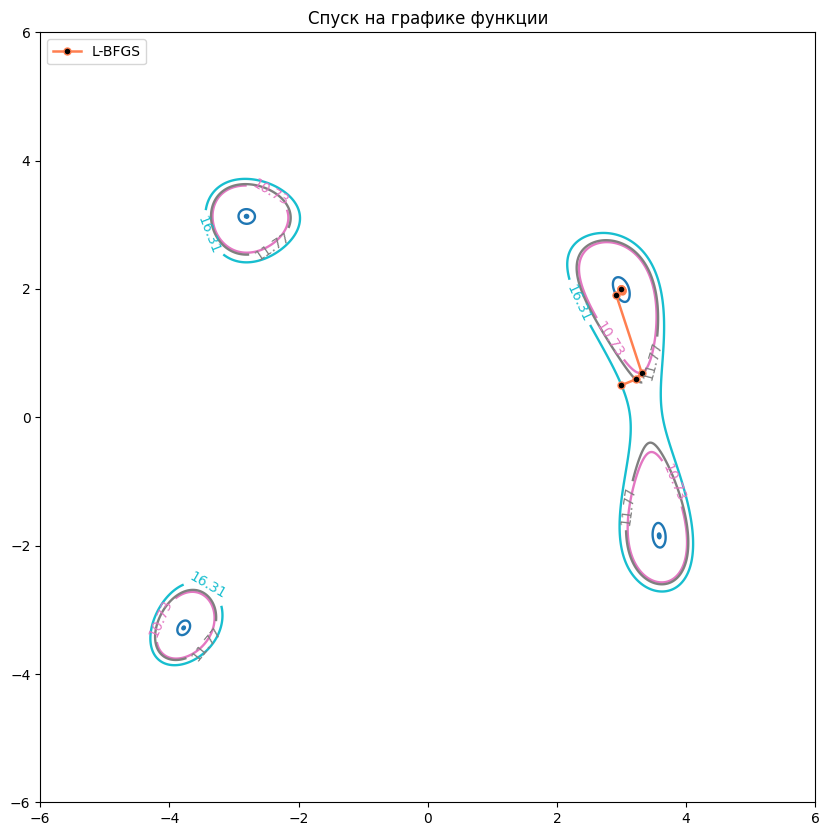

L-BFGS          ==>   0.000000 in [  3.000000,   2.000000] in 11 steps.


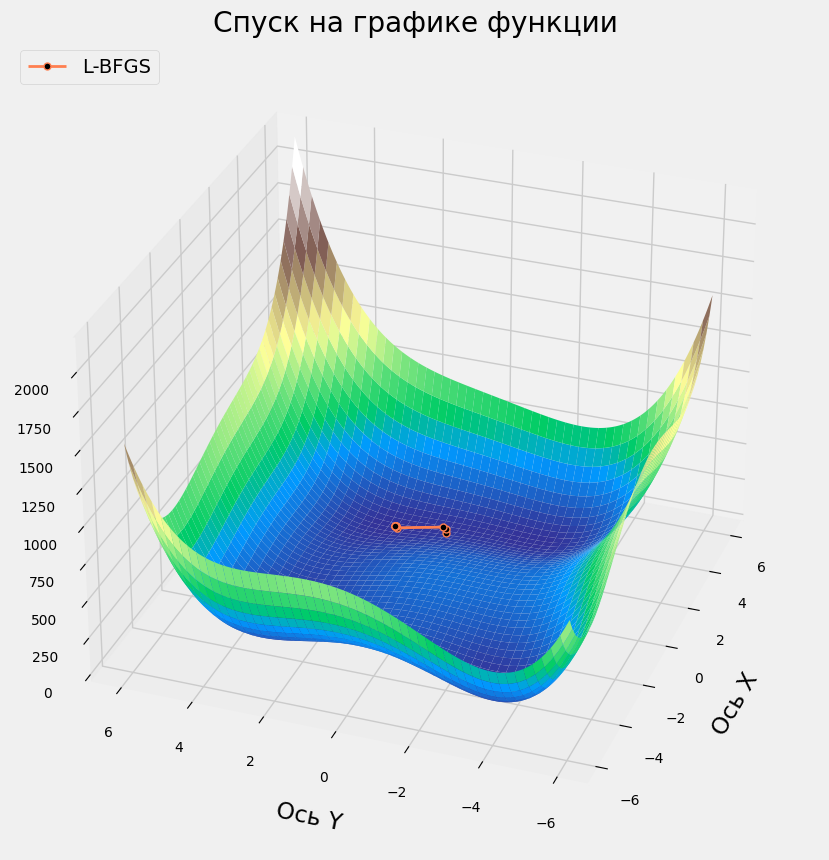

SciPy implementation
SciPy L-BFGS    ==>   0.000000 in [  3.000000,   2.000000] in 9 steps.


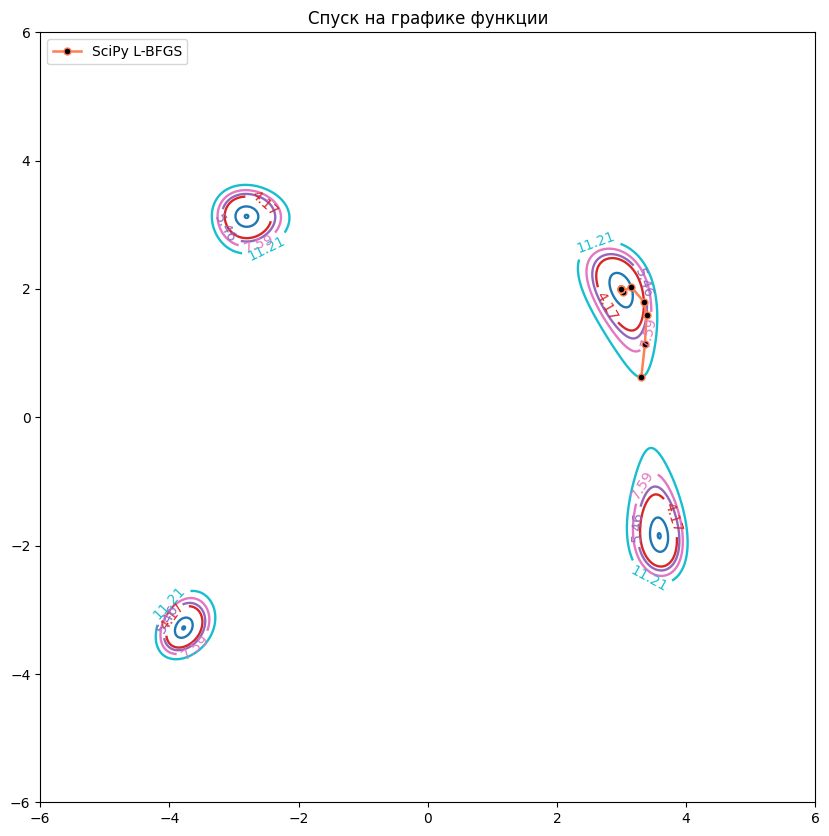

SciPy L-BFGS    ==>   0.000000 in [  3.000000,   2.000000] in 9 steps.


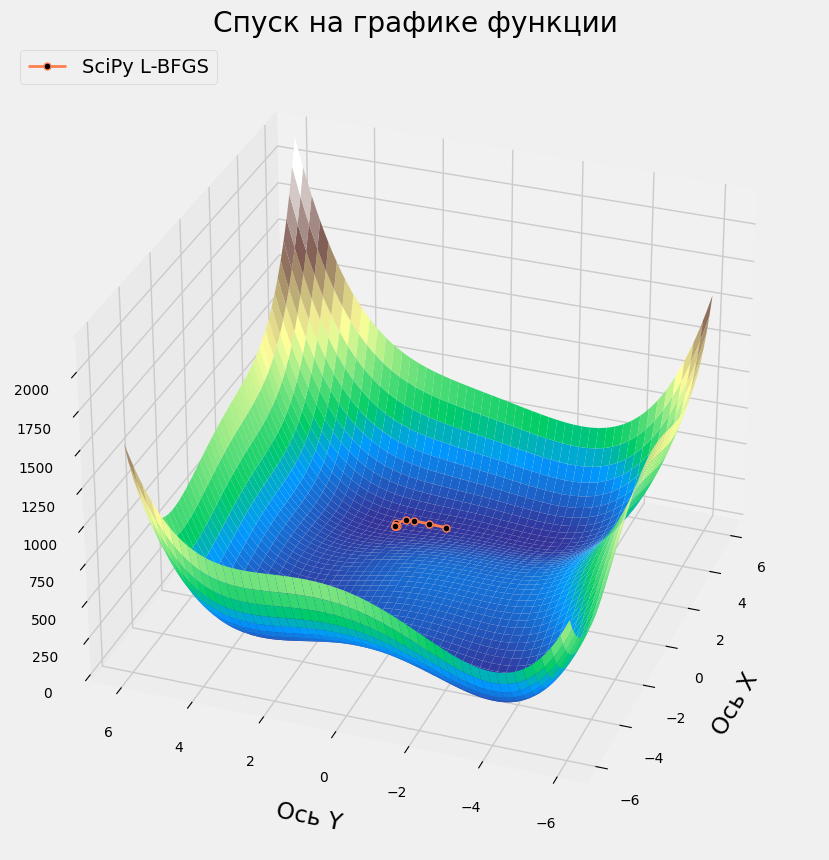

In [4]:
initial_x = np.array([3.0, 0.5])

x_lin = np.linspace(-6, 6, 1200, dtype=float)
y_lin = np.linspace(-6, 6, 1200, dtype=float)


helper.compare(f_himmelblau, initial_x, x_lin, y_lin, l_bfgs, 'L-BFGS-B', 'L-BFGS', max_iter=11, elev=(30, 30), azim=(200, 200), manual_save_history=True)